# Choropleth Map 

A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area, or it shows the level of variability within a region.

Plotly can easly create Choropleth map with plotly express module. In this excise, I will demonstrate how to build tile-map choropleth maps using Plotly Express' `px.choropleth_mapbox` function.

In [1]:
import json
import pandas as pd
import plotly.express as px

##### Geojson 
In order to create region on a map, geojson file is required.

In [2]:
# Open and read geojson file
with open('geojson-counties-fips.json') as response:
    counties = json.load(response)

counties['features'][0]

{'type': 'Feature',
 'properties': {'GEO_ID': '0500000US01001',
  'STATE': '01',
  'COUNTY': '001',
  'NAME': 'Autauga',
  'LSAD': 'County',
  'CENSUSAREA': 594.436},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-86.496774, 32.344437],
    [-86.717897, 32.402814],
    [-86.814912, 32.340803],
    [-86.890581, 32.502974],
    [-86.917595, 32.664169],
    [-86.71339, 32.661732],
    [-86.714219, 32.705694],
    [-86.413116, 32.707386],
    [-86.411172, 32.409937],
    [-86.496774, 32.344437]]]},
 'id': '01001'}

##### Data

Read unemploy rate by county data into pandas dataframe.

In [3]:
# open dataframe
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                 dtype={"fips": str})
df.head()

,fips,unemp
0,01001,5.3
1,01003,5.4
2,01005,8.6
3,01007,6.6
4,01009,5.5


##### Cholopleth map plot

Use `px.choropleth_mapbox` to generate a map. Detailed list of argument are here: https://plotly.com/python/mapbox-county-choropleth/ and https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth_mapbox.html

The `'id'` field and values in `'fips'` column are matching. Default value of choropleth argument `featureidkey=` is `'id'`, so no need to pass the argument.

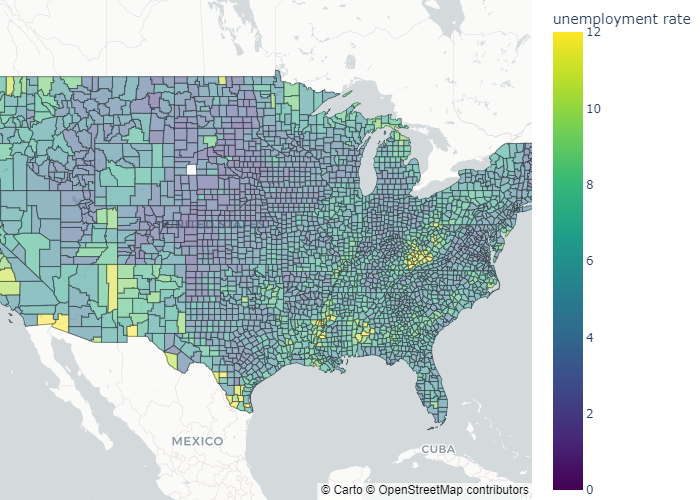

In [4]:
fig = px.choropleth_mapbox(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 38, "lon": -96},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show('png')

##### Indexing by GeoJSON Properties

If the GeoJSON you are using either does not have an id field or you wish to use one of the keys in the properties field, you may use the `featureidkey=` parameter to specify where to match the values of locations.

In [5]:
# Open and read geojson file
with open('Texas_County_Boundaries.json') as response:
    counties = json.load(response)

counties['features'][0]['properties']

{'OBJECTID': 1,
 'CMPTRL_CNTY_NBR': 232,
 'DPS_CNTY_NBR': 232,
 'FIPS_ST_CNTY_CD': '48463',
 'TXDOT_CNTY_NBR': 232,
 'TXDOT_DIST_NBR': 15,
 'CNTY_NM': 'Uvalde',
 'GID': 35,
 'SHAPE_Length': 2.475514873638089,
 'SHAPE_Area': 0.37652236395334576}

In [6]:
# data of income by texas counties from wiki webpage 
url = 'https://en.wikipedia.org/wiki/List_of_Texas_locations_by_per_capita_income'
df = pd.read_html(url)
df = df[1]
df.head()

# remove non-number and change datatype to int

df['Medianfamilyincome'] = df['Medianfamilyincome'].str.replace('$', '')
df['Medianfamilyincome'] = df['Medianfamilyincome'].str.replace(',', '')
df['Medianfamilyincome'] = df['Medianfamilyincome'].astype('int32')
df.head()


C:\Users\Joonhee\AppData\Local\Temp\ipykernel_20900\1543607594.py:9: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Rank,County,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1.0,Collin,"$42,220","$83,889",84306,782341,181970
1,2.0,Borden,"$40,916","$58,409",60536,641,264
2,3.0,King,"$39,511","$61,563",80500,286,113
3,4.0,Loving,"$37,362","$80,504",94785,134,31
4,5.0,Kendall,"$36,418","$66,655",80801,33410,12617


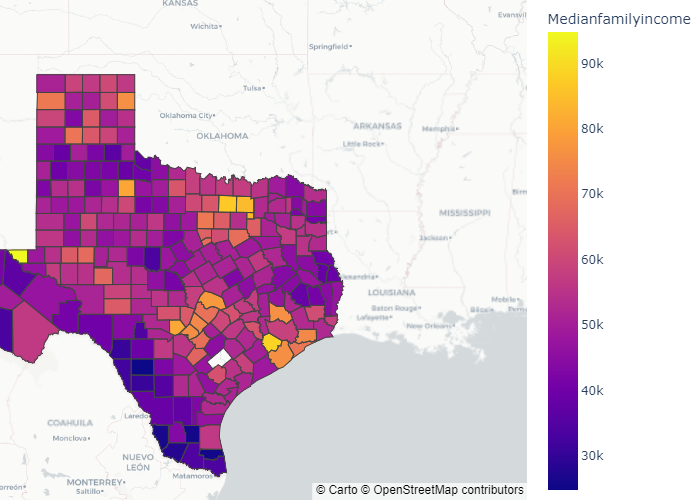

In [8]:
# Choropleth map using featureidkey
fig = px.choropleth_mapbox(df, geojson=counties, locations='County', color='Medianfamilyincome',
                           featureidkey='properties.CNTY_NM',
                           mapbox_style="carto-positron",
                           zoom=4.5, center = {"lat": 32, "lon": -96})

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show('png')